In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [346]:
# read into first data set, Poverty Report
df = pd.read_csv('resources/PovertyReport.csv')

In [347]:
# read into only neccesary colummns
df = df[['state_National', 'total_est_pct2']]
df = df.dropna(inplace=False)

In [348]:
# create state abbreviations for heat map
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia' : 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [349]:
# Add abbreviation column to DataFrame
df['Abbreviation'] = df['state_National'].map(state_abbreviations)

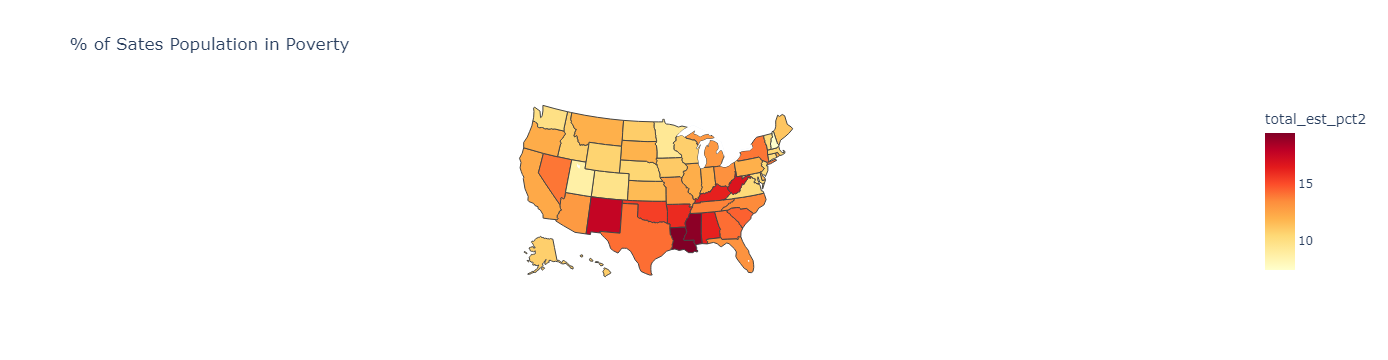

In [350]:
# Create the choropleth map
fig = px.choropleth(df,
                    locations='Abbreviation',
                    locationmode="USA-states",
                    color='total_est_pct2',
                    scope="usa",
                    color_continuous_scale="YlOrRd",  # or any other color scale
                    title=" % of Sates Population in Poverty")

# Show the figure
fig.show()

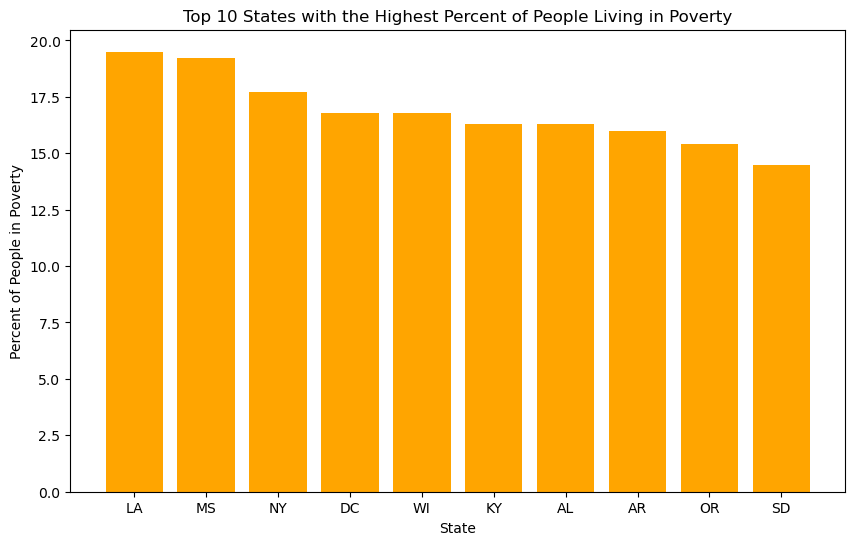

In [351]:
# Create a DataFrame from the provided data to display the top 10 states with highest poverty percentage
data = {
    'state_National': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
                       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
                       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
                       'Mississippi', 'Missouri', 'Montana', 'National', 'Nebraska', 'Nevada', 'New Hampshire', 
                       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
                       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
                       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'],
    'total_est_pct2': [16.3, 10.8, 12.9, 16.0, 12.3, 9.7, 10.1, 11.5, 16.8, 13.2, 14.2, 10.9, 10.8, 12.1, 12.1, 11.0, 
                       11.6, 16.3, 19.5, 11.2, 10.3, 10.4, 13.0, 9.3, 19.2, 12.8, 12.0, 12.8, 10.5, 14.0, 7.4, 10.2, 17.7, 
                       14.0, 13.5, 10.9, 13.3, 15.4, 12.2, 12.0, 12.1, 14.5, 11.9, 13.7, 14.2, 8.7, 10.2, 10.3, 9.9, 16.8, 
                       10.8],
    'Abbreviation': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 
                     'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 
                     'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
                     'WV', 'WI', 'WY']
}

df4 = pd.DataFrame(data)

# Sort the DataFrame based on the total_est_pct2 column in descending order and select the top 5 states
top_5_states = df4.sort_values(by='total_est_pct2', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['Abbreviation'], top_5_states['total_est_pct2'], color='orange')
plt.xlabel('State')
plt.ylabel('Percent of People in Poverty')
plt.title('Top 10 States with the Highest Percent of People Living in Poverty')
plt.savefig('images/poverty_graph.png')
plt.show();

In [352]:
#read into death_data to look at opiode related deaths per state
df5 = pd.read_csv('Resources/death_data.csv')

In [353]:
# read into pop_by_state_df.csv
pop_by_state_df = pd.read_csv('Resources/pop_by_state_df.csv')

In [354]:
#create df for states population
pop_by_state_df2 = pd.DataFrame(pop_by_state_df[["ST","2014"]])  ##Need to copy to main notebook
pop_by_state_df2["2014"] = pop_by_state_df2["2014"] / 100000     ##Need to copy to main notebook
pop_by_state_df2["2014"] = pop_by_state_df2["2014"].round(2)     ##Need to copy to main notebook
pop_by_state_df2 = pop_by_state_df2.rename(columns={"ST":"Abbreviation",  ##Need to copy to main notebook
                                                    "2014":"Population"}) ##Need to copy to main notebook
pop_by_state_df2.head()

,Abbreviation,Population
0,AL,48.32
1,AK,7.38
2,AZ,66.35
3,AR,29.60
4,CA,382.54


In [355]:
# add abbreviation column for heat map of united states
df2['Abbreviation'] = df2['State'].map(state_abbreviations)

In [356]:
# add abbreviation column and read into only neccessary columns and rows
df3 = df2.loc[(df2["Year"] == 2014), ["State", "Deaths", "Abbreviation"]]
df3 = pd.merge(df3, pop_by_state_df2, how="inner", on="Abbreviation")
df3 = df3[["State", "Abbreviation", "Deaths", "Population"]]
df3["Deaths"] = df3["Deaths"].astype(int)
df3["Deaths per 100k"] = df3["Deaths"].div(df3["Population"].values,axis=0)
df3["Deaths per 100k"] = df3["Deaths per 100k"].round(3)
df3.head()

,State,Abbreviation,Deaths,Population,Deaths per 100k
0,Alabama,AL,282,48.32,5.836
1,Alaska,AK,79,7.38,10.705
2,Arizona,AZ,616,66.35,9.284
3,Arkansas,AR,179,29.60,6.047
4,California,CA,2159,382.54,5.644


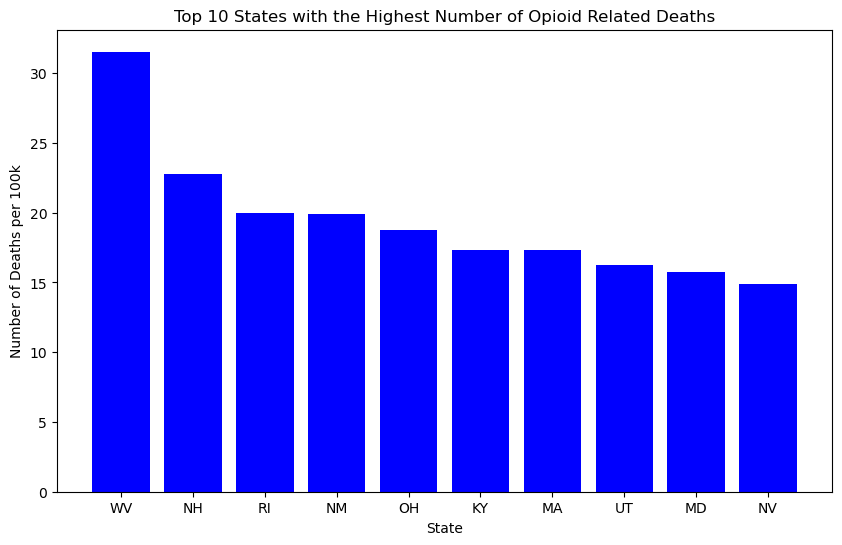

In [357]:
# create bar chart with top 10 states with # of deaths 
#prepare the bar chart information

data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
              'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
              'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
              'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 
              'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'Year': [2014] * 51,
    'Deaths': df3["Deaths per 100k"],
    'Abbreviation': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 
                     'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 
                     'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
                     'WV', 'WI', 'WY']
}

df = pd.DataFrame(data)

# Sort the DataFrame based on the Deaths column in descending order and select the top 5 states
top_5_states = df.sort_values(by='Deaths', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['Abbreviation'], top_5_states['Deaths'], color='blue')
plt.xlabel('State')
plt.ylabel('Number of Deaths per 100k')
plt.title('Top 10 States with the Highest Number of Opioid Related Deaths')
plt.savefig('images/opiod_deathsV2.png')
plt.show();


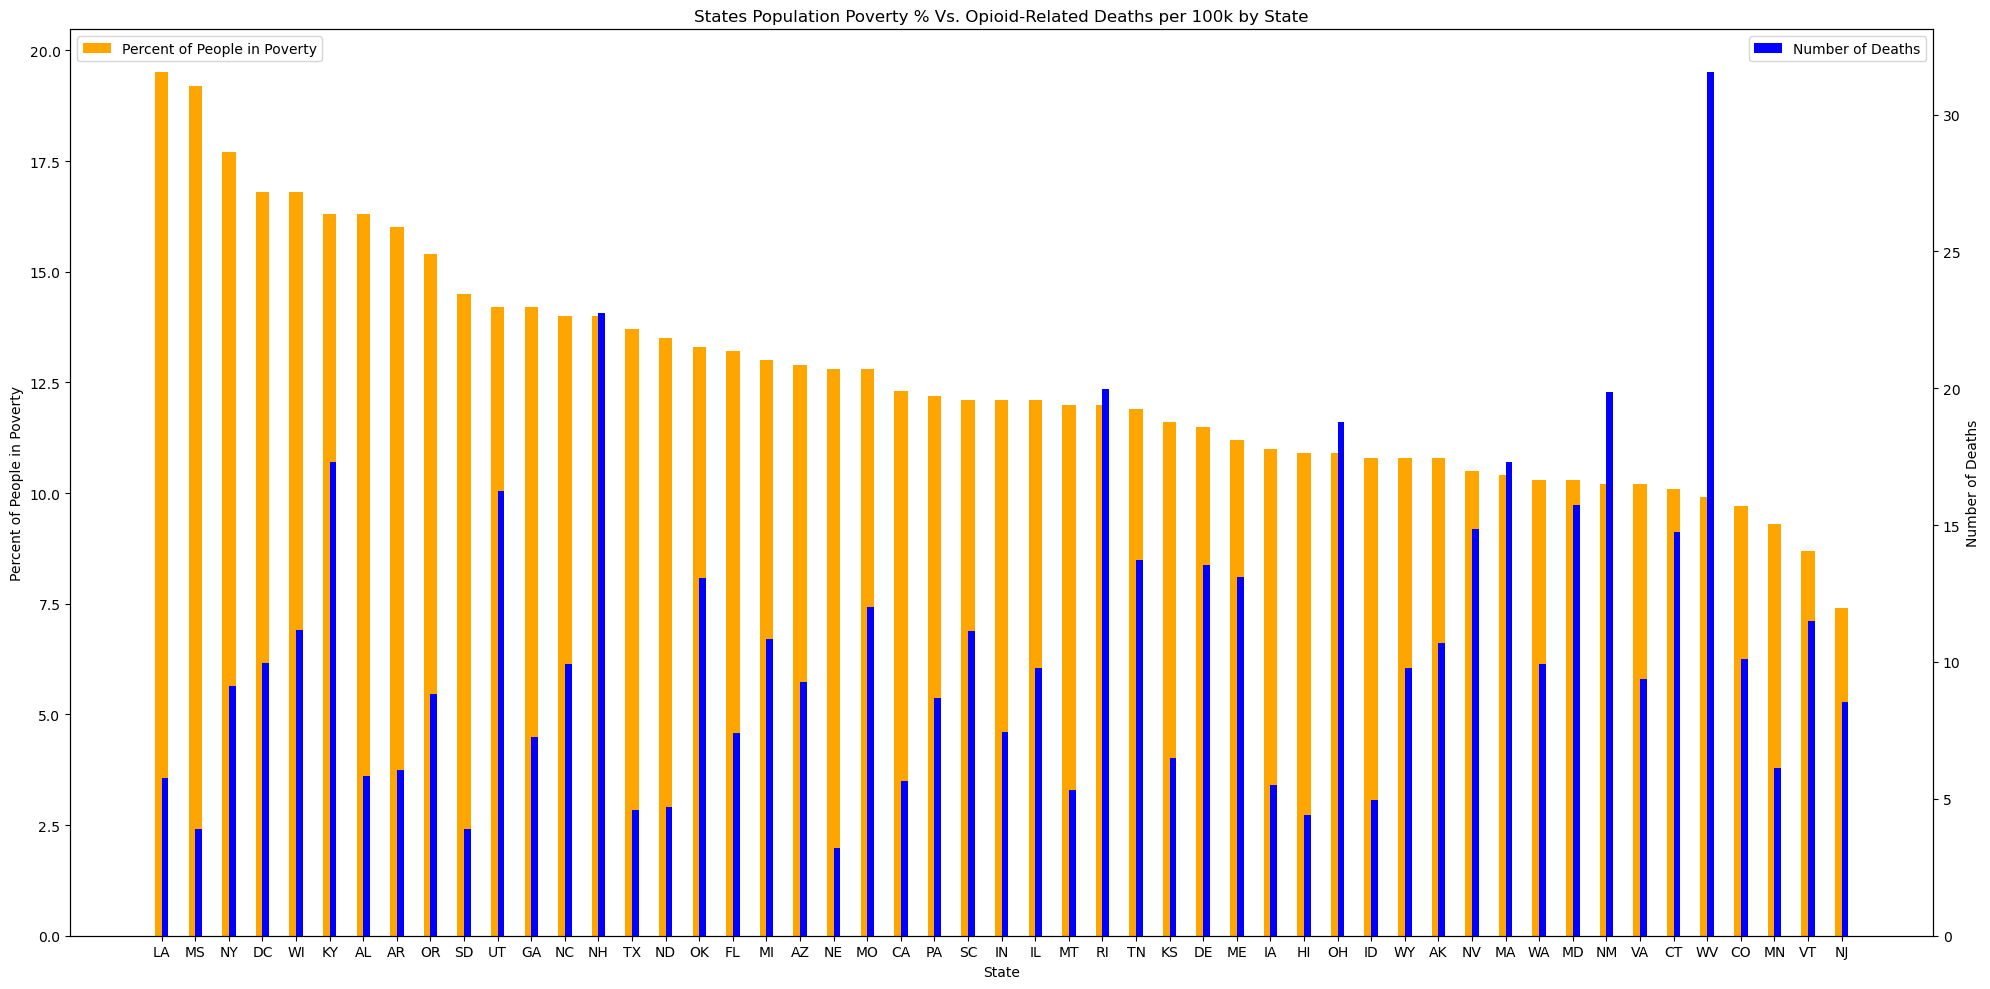

In [358]:



import pandas as pd
import matplotlib.pyplot as plt
# Data for the first bar graph
data_poverty = {
    'state_National': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
                       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
                       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
                       'Mississippi', 'Missouri', 'Montana', 'National', 'Nebraska', 'Nevada', 'New Hampshire',
                       'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
                       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
                       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'],
    'total_est_pct2': [16.3, 10.8, 12.9, 16.0, 12.3, 9.7, 10.1, 11.5, 16.8, 13.2, 14.2, 10.9, 10.8, 12.1, 12.1, 11.0,
                       11.6, 16.3, 19.5, 11.2, 10.3, 10.4, 13.0, 9.3, 19.2, 12.8, 12.0, 12.8, 10.5, 14.0, 7.4, 10.2, 17.7,
                       14.0, 13.5, 10.9, 13.3, 15.4, 12.2, 12.0, 12.1, 14.5, 11.9, 13.7, 14.2, 8.7, 10.2, 10.3, 9.9, 16.8,
                       10.8],
    'Abbreviation': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
                     'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
                     'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
                     'WV', 'WI', 'WY']
}
# Data for the second bar graph
data_deaths = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
              'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
              'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
              'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
              'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
              'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'Year': [2014] * 51,
    'Deaths': df3["Deaths per 100k"],
    'Abbreviation': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
                     'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
                     'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
                     'WV', 'WI', 'WY']
}
df_poverty = pd.DataFrame(data_poverty)
df_deaths = pd.DataFrame(data_deaths)
# Merge the two DataFrames on the Abbreviation column
merged_df = pd.merge(df_poverty, df_deaths[['Abbreviation', 'Deaths']], on='Abbreviation')
merged_df = merged_df.sort_values("total_est_pct2", ascending=False)

# Plot the combined bar chart
fig, ax1 = plt.subplots(figsize=(20, 10))
# Plot the percent of people in poverty
ax1.bar(merged_df['Abbreviation'], merged_df['total_est_pct2'], color='orange', width=0.4, align='center', label='Percent of People in Poverty')
ax1.set_xlabel('State')
ax1.set_ylabel('Percent of People in Poverty', color='Black')
ax1.tick_params(axis='y', labelcolor='Black')
ax1.set_title('States Population Poverty % Vs. Opioid-Related Deaths per 100k by State')
# Create another y-axis to plot the number of deaths
ax2 = ax1.twinx()
ax2.bar(merged_df['Abbreviation'], merged_df['Deaths'], color='blue', width=0.2, align='edge', label='Number of Deaths')
ax2.set_ylabel('Number of Deaths', color='black')
ax2.tick_params(axis='y', labelcolor='Black')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Adjust the layout to make room for the rotated x-axis labels
plt.tight_layout()
# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('images/poverty_vs_deaths.png')
plt.show();